# Basic channel capacity behaviors
[Video lecture](https://www.youtube.com/watch?v=kP_FhaclHPg).

Consider the basic channel model in which the received signal $y = \sqrt \beta *x+n$,
where $\beta$ is channel gain ($\sqrt \beta$ is called channel response), $x$ is the
transmitted signal with $q$ energy per symbol, and $n$ is channel noise with
variance $N_0$. The channel capacity $C$ with bandwidth $B$ symbols/second is:
$$C=B*log_2\left(1+\frac{q\beta}{N_0}\right)=B*log_2(SNR)$$


In addition, the energy per symbol $q$ is equal to: $q=\frac{P}{B}$, where $P$ is measured
in Watt. Then, we have:
$$C=B*log_2\left(1+\frac{P\beta}{BN_0}\right) \text{ bit/s}$$

Consider that $log_2(1+z)\approx
                            \begin{cases}
                            log_2(e)*z & \text{if } z \approx 0 \\
                            log_2(z)   & \text{if } z \gg 0
                            \end{cases}$
## Changing the power $P$
- With low SNR, capacity grows linearly with $P$.
- With high SNR, capacity grows slowly with $P$.

With $\beta/N_0=10^6\text{ Hz/W}$, $B=10 \text{ MHz}$:

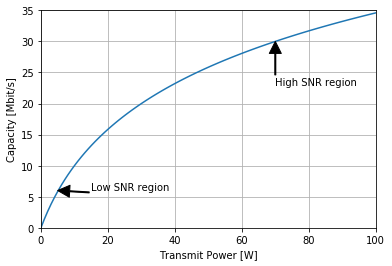

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import log2

def channel_capacity(b, p, beta_over_n0):
    return b*log2(1+p/b*beta_over_n0)

transmit_powers = np.linspace(0, 100, 100)
capacity = [channel_capacity(10*10**6, power, 10**6)/10**6 for power in transmit_powers]
plt.plot(transmit_powers, capacity)
plt.xlabel('Transmit Power [W]')
plt.ylabel('Capacity [Mbit/s]')
plt.annotate('Low SNR region', xy=(5,6), xytext=(15,6),
             arrowprops=dict(width=1, facecolor='black'))
plt.annotate('High SNR region', xy=(70,30), xytext=(70,23),
             arrowprops=dict(width=1, facecolor='black'))
plt.xlim([0,100])
plt.ylim([0, 35])
plt.grid(True)

## Changing the bandwidth $B$
- With small bandwidth, high SNR, capacity grows linearly with $B$.
- With large bandwidth, small SNR, capacity converges to an upper limit.

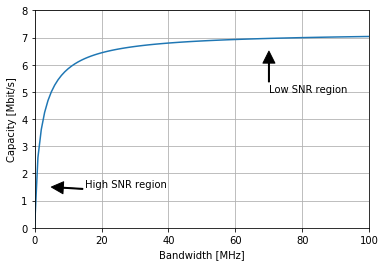

In [2]:
bandwidths = np.linspace(1, 100*10**6, 101)
capacity2 = [channel_capacity(bandwidth, 5, 10**6)/10**6 for bandwidth in bandwidths]
plt.plot(bandwidths/10**6, capacity2)
plt.xlabel('Bandwidth [MHz]')
plt.ylabel('Capacity [Mbit/s]')
plt.xlim([0,100])
plt.ylim([0, 8])
plt.annotate('High SNR region', xy=(5,1.5), xytext=(15,1.5),
             arrowprops=dict(width=1, facecolor='black'))
plt.annotate('Low SNR region', xy=(70,6.5), xytext=(70,5),
             arrowprops=dict(width=1, facecolor='black'))
plt.grid(True)

## Summary
- Low SNR = power-limited region, increase power to increase capacity.
- High SNR = bandwidth-limited region, increase bandwidth to increase capacity.
